In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import Pipeline

C:\Users\smita\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
file_path = 'file.csv'
data = pd.read_csv(file_path)
data.head()

,Date,sales count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,sku
0,12/1/2017,854,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0,Winter,No Holiday,Yes,10017413
1,12/1/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0,Winter,No Holiday,Yes,10016283
2,12/1/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0,Winter,No Holiday,Yes,10009781
3,12/1/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0,Winter,No Holiday,Yes,10015921
4,12/1/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0,Winter,No Holiday,Yes,10017833


# Data Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       100 non-null    object 
 1   sales count                100 non-null    int64  
 2   Hour                       100 non-null    int64  
 3   Temperature(°C)            100 non-null    float64
 4   Humidity(%)                100 non-null    int64  
 5   Wind speed (m/s)           100 non-null    float64
 6   Visibility (10m)           100 non-null    int64  
 7   Dew point temperature(°C)  100 non-null    float64
 8   Solar Radiation (MJ/m2)    100 non-null    float64
 9   Rainfall(mm)               100 non-null    float64
 10  Snowfall (cm)              100 non-null    int64  
 11  Seasons                    100 non-null    object 
 12  Holiday                    100 non-null    object 
 13  Functioning Day            100 non-null    object 


In [4]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,100,5,12/1/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales count,100.0,NaN,NaN,NaN,352.13,204.035581,13.0,199.5,353.5,467.0,937.0
Hour,100.0,NaN,NaN,NaN,11.1,7.098869,0.0,5.0,11.0,17.0,23.0
Temperature(°C),100.0,NaN,NaN,NaN,0.563,4.383248,-7.6,-3.05,0.7,4.125,8.0
Humidity(%),100.0,NaN,NaN,NaN,59.68,22.769766,21.0,38.75,57.5,82.0,92.0
Wind speed (m/s),100.0,NaN,NaN,NaN,2.094,1.163921,0.5,1.375,1.7,2.5,5.8
Visibility (10m),100.0,NaN,NaN,NaN,1318.5,704.705576,129.0,472.0,1467.5,2000.0,2000.0
Dew point temperature(°C),100.0,NaN,NaN,NaN,-7.261,7.990106,-22.4,-15.65,-5.35,-0.4,3.8
Solar Radiation (MJ/m2),100.0,NaN,NaN,NaN,0.221,0.374512,0.0,0.0,0.0,0.2425,1.17
Rainfall(mm),100.0,NaN,NaN,NaN,0.041,0.272324,0.0,0.0,0.0,0.0,2.5


# Check Null Value

In [5]:
data.isnull().sum()

Date                         0
sales count                  0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
sku                          0
dtype: int64

In [6]:
data["Date"] = pd.to_datetime(data["Date"])
data["weekday"] = data["Date"].dt.day_name()
data["Day"] = data["Date"].dt.day
data["Month"] = data["Date"].dt.month
data["Year"] = data["Date"].dt.year
data.drop("Date", axis=1, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sales count                100 non-null    int64  
 1   Hour                       100 non-null    int64  
 2   Temperature(°C)            100 non-null    float64
 3   Humidity(%)                100 non-null    int64  
 4   Wind speed (m/s)           100 non-null    float64
 5   Visibility (10m)           100 non-null    int64  
 6   Dew point temperature(°C)  100 non-null    float64
 7   Solar Radiation (MJ/m2)    100 non-null    float64
 8   Rainfall(mm)               100 non-null    float64
 9   Snowfall (cm)              100 non-null    int64  
 10  Seasons                    100 non-null    object 
 11  Holiday                    100 non-null    object 
 12  Functioning Day            100 non-null    object 
 13  sku                        100 non-null    int64  


In [8]:
data.head()

,sales count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,sku,weekday,Day,Month,Year
0,854,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0,Winter,No Holiday,Yes,10017413,Friday,1,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0,Winter,No Holiday,Yes,10016283,Friday,1,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0,Winter,No Holiday,Yes,10009781,Friday,1,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0,Winter,No Holiday,Yes,10015921,Friday,1,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0,Winter,No Holiday,Yes,10017833,Friday,1,12,2017


# EDA

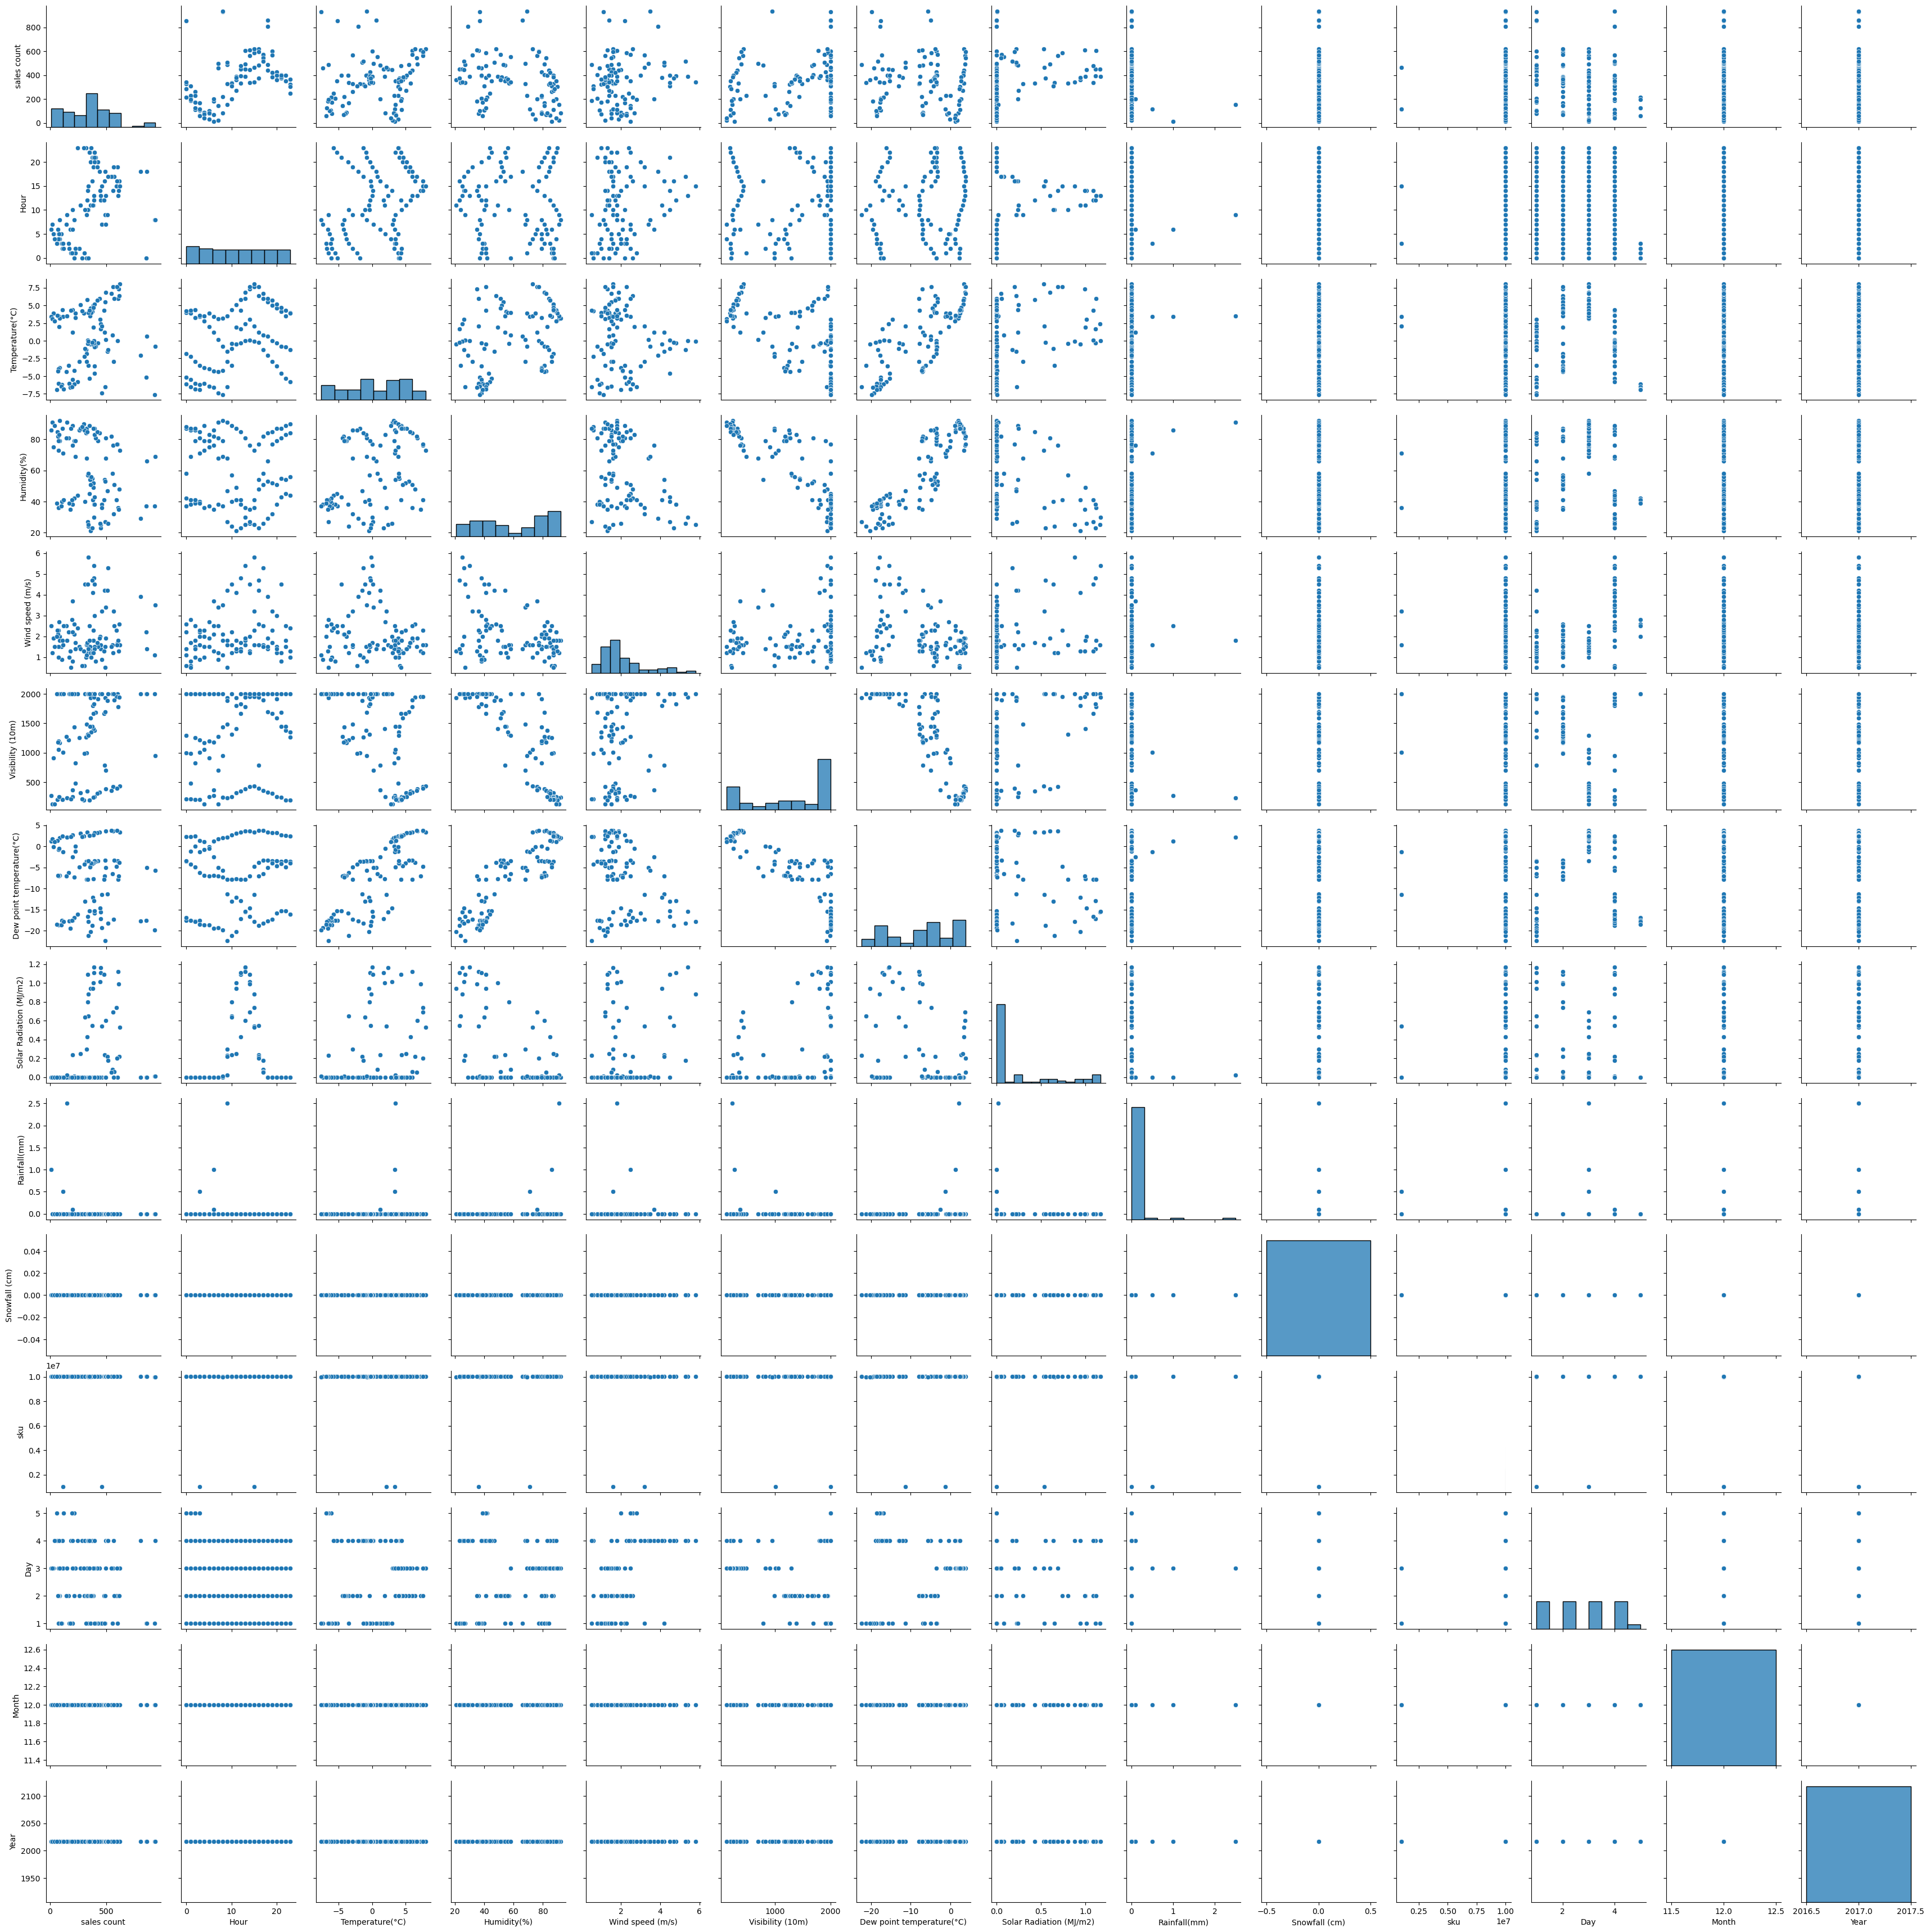

In [9]:
sns.pairplot(data)

C:\Users\smita\AppData\Local\Temp\ipykernel_7388\2374912215.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Month = data.groupby("Month").sum().reset_index()


<Axes: xlabel='Month', ylabel='sales count'>

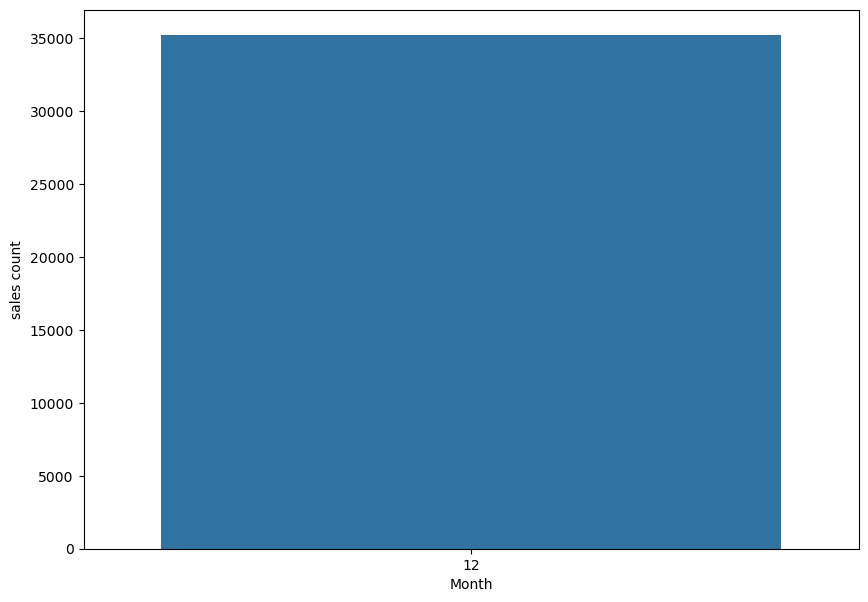

In [10]:
plt.figure(figsize=(10,7))
Month = data.groupby("Month").sum().reset_index()
sns.barplot(x="Month", y="sales count",data=Month)

C:\Users\smita\AppData\Local\Temp\ipykernel_7388\3332250346.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Day = data.groupby("Day").sum().reset_index()


<Axes: xlabel='Day', ylabel='sales count'>

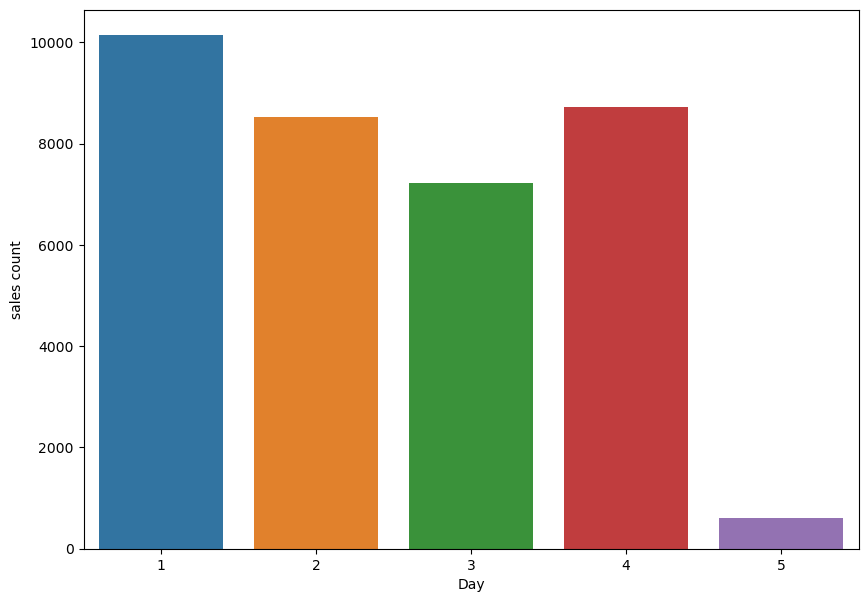

In [11]:
plt.figure(figsize=(10,7))
Day = data.groupby("Day").sum().reset_index()
sns.barplot(x="Day", y="sales count",data=Day)

C:\Users\smita\AppData\Local\Temp\ipykernel_7388\3912433133.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Year = data.groupby("Year").sum().reset_index()


<Axes: xlabel='Year', ylabel='sales count'>

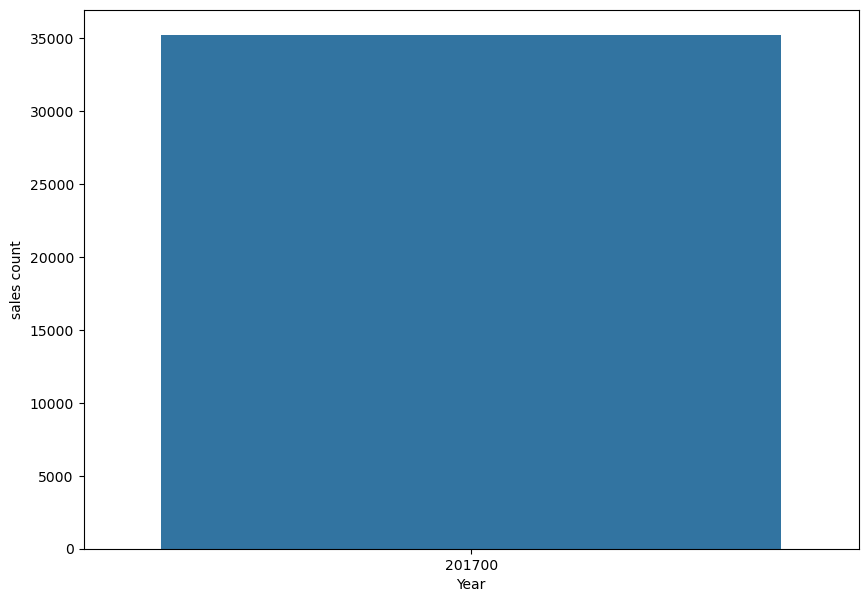

In [13]:
plt.figure(figsize=(10,7))
Year = data.groupby("Year").sum().reset_index()
sns.barplot(x="Year", y="sales count",data=Month)

<Axes: xlabel='Functioning Day', ylabel='sales count'>

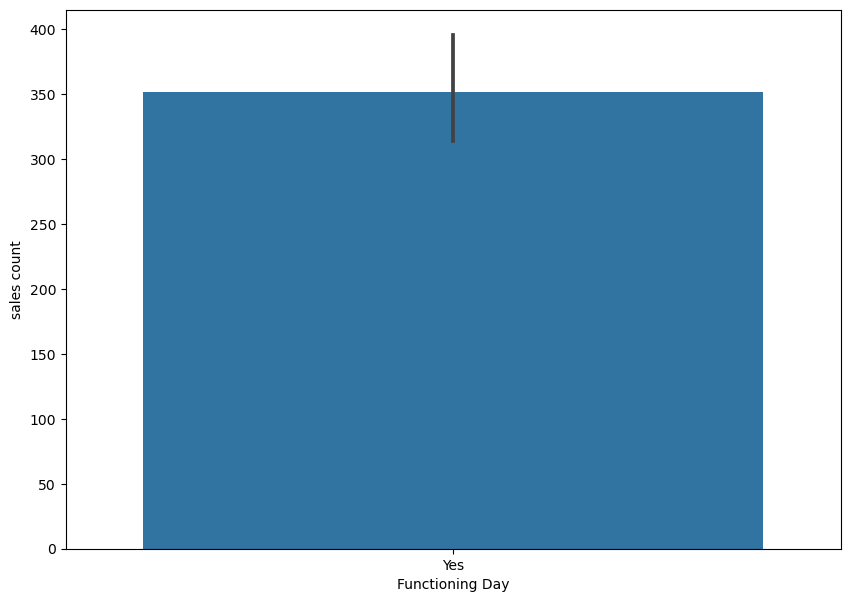

In [14]:
plt.figure(figsize=(10,7))
sns.barplot(x="Functioning Day", y="sales count",data=data)


<Axes: xlabel='Seasons', ylabel='sales count'>

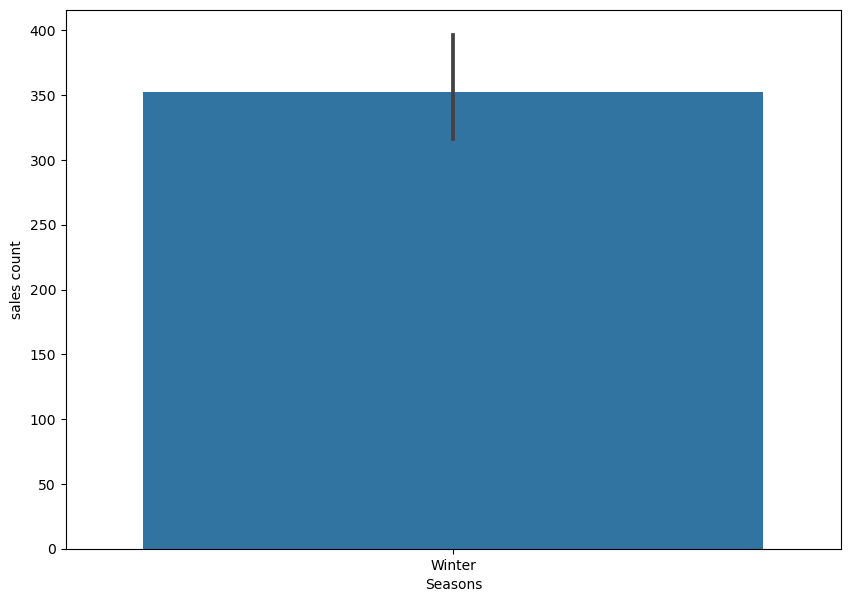

In [15]:
plt.figure(figsize=(10,7))
sns.barplot(x="Seasons", y="sales count",data=data)


<Axes: xlabel='Holiday', ylabel='sales count'>

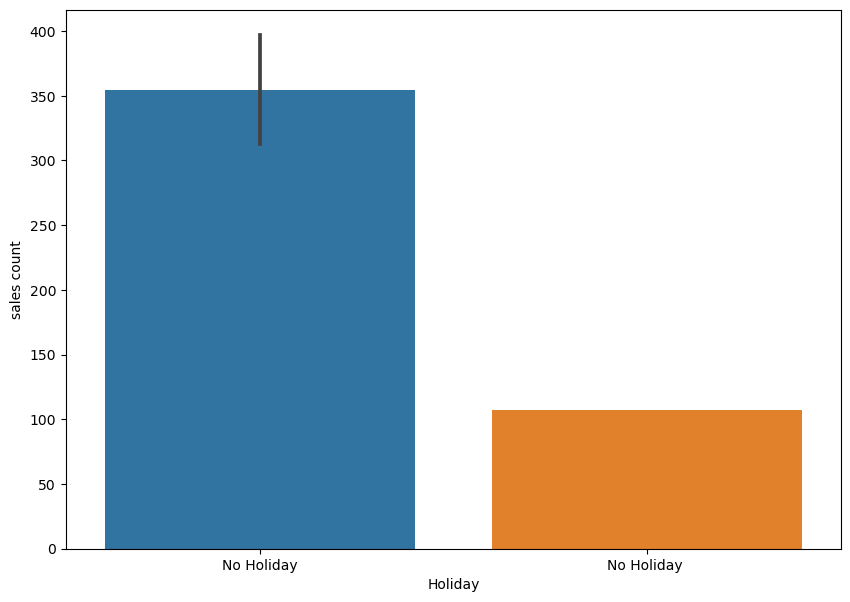

In [16]:
plt.figure(figsize=(10,7))
sns.barplot(x="Holiday", y="sales count",data=data)


<Axes: xlabel='Hour', ylabel='sales count'>

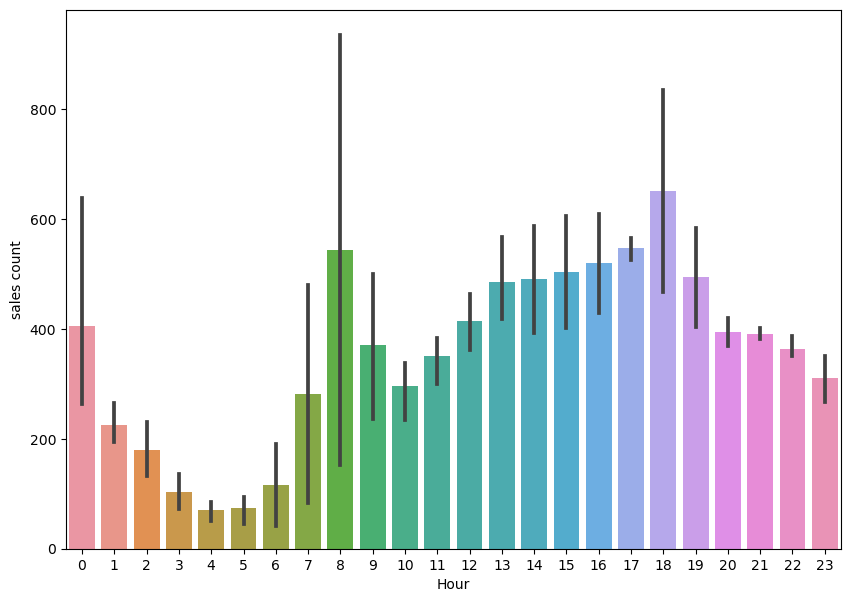

In [17]:
plt.figure(figsize=(10,7))
sns.barplot(x="Hour", y="sales count",data=data)

<Axes: xlabel='Dew point temperature(°C)', ylabel='sales count'>

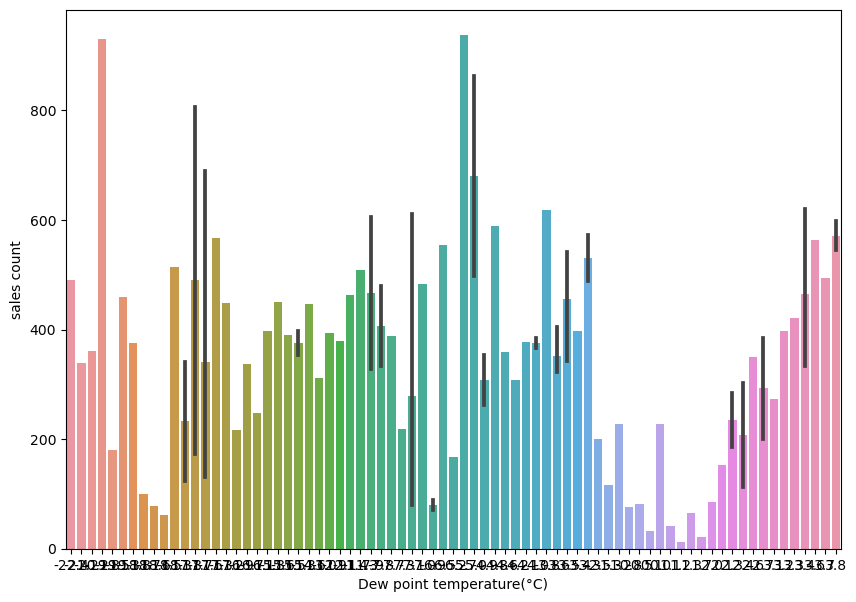

In [18]:
plt.figure(figsize=(10,7))
sns.barplot(x="Dew point temperature(°C)", y="sales count",data=data)


<Axes: xlabel='Wind speed (m/s)', ylabel='sales count'>

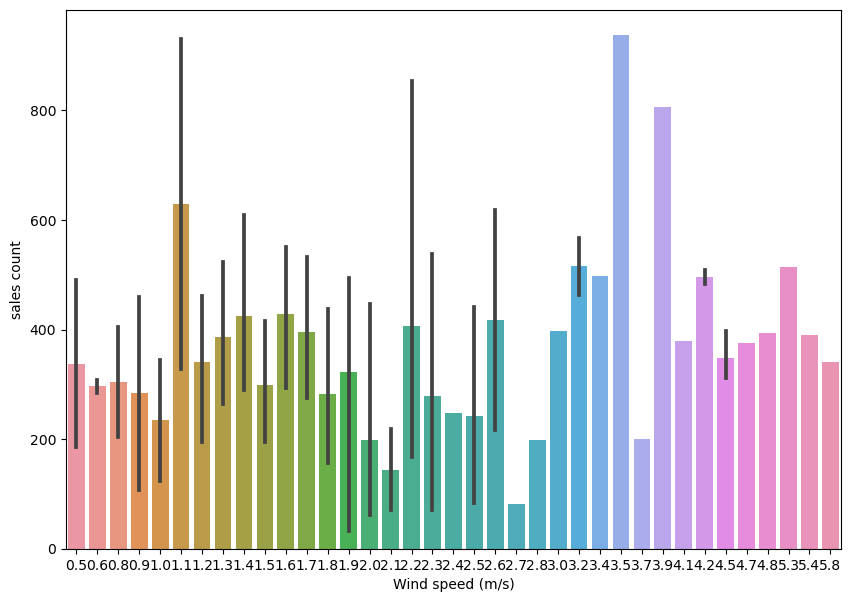

In [19]:
plt.figure(figsize=(10,7))
sns.barplot(x="Wind speed (m/s)", y="sales count",data=data)


<Axes: xlabel='Visibility (10m)', ylabel='sales count'>

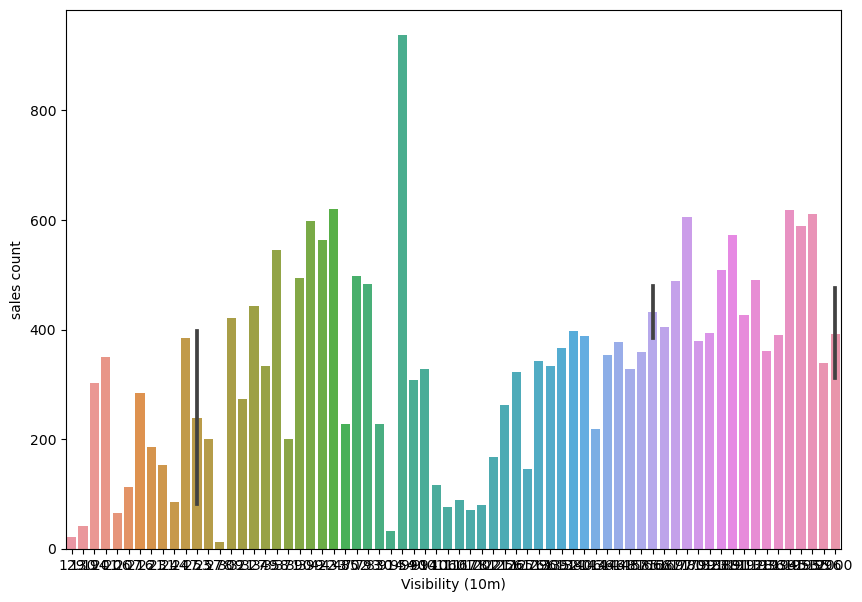

In [20]:
plt.figure(figsize=(10,7))
sns.barplot(x="Visibility (10m)", y="sales count",data=data)

<Axes: xlabel='Solar Radiation (MJ/m2)', ylabel='sales count'>

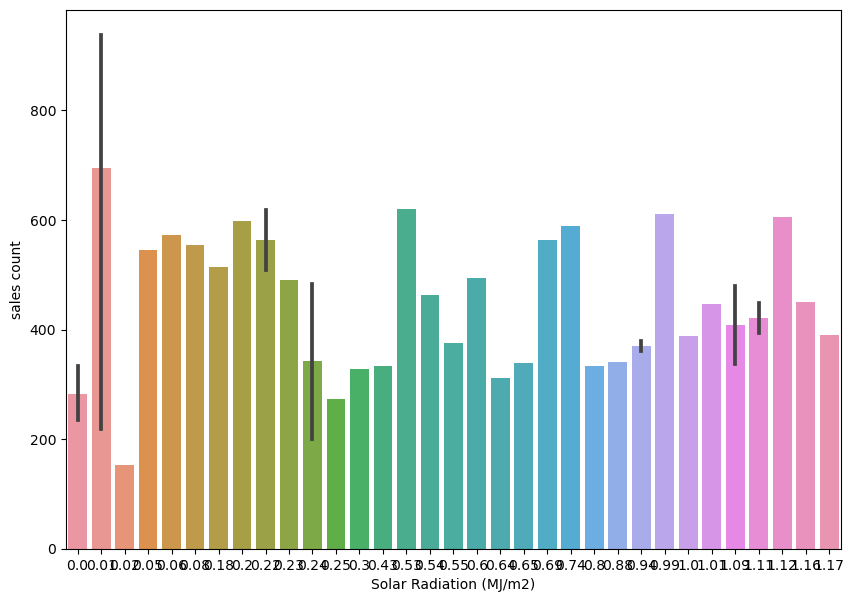

In [21]:
plt.figure(figsize=(10,7))
sns.barplot(x="Solar Radiation (MJ/m2)", y="sales count",data=data)

<Axes: xlabel='Snowfall (cm)', ylabel='sales count'>

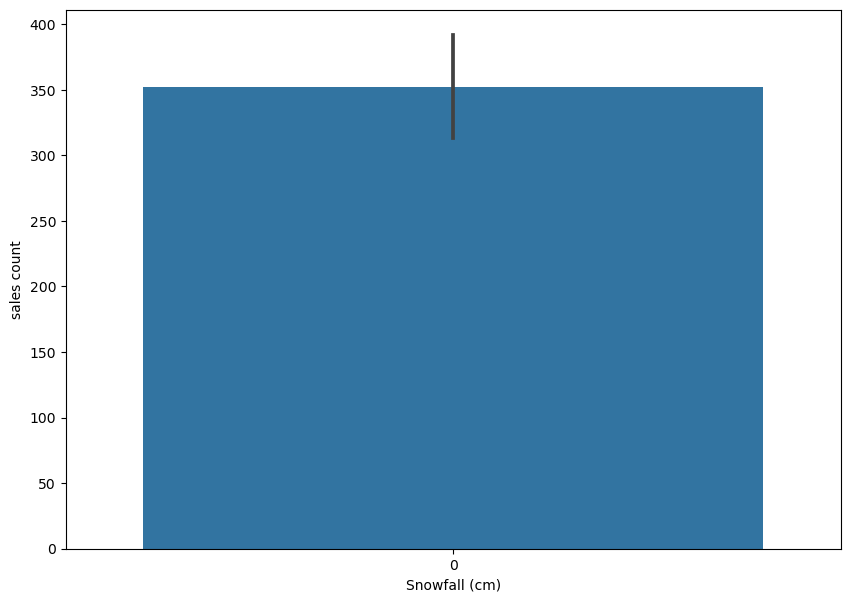

In [22]:
plt.figure(figsize=(10,7))
sns.barplot(x="Snowfall (cm)", y="sales count",data=data)

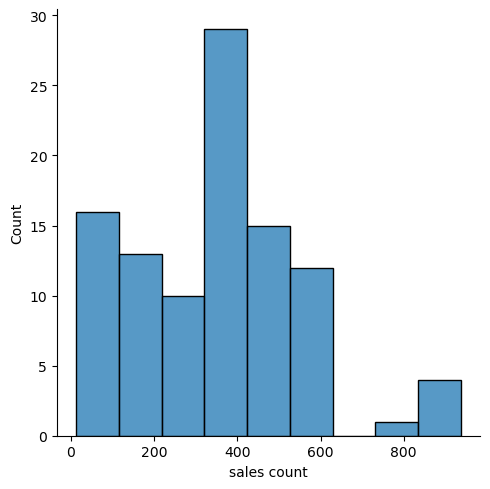

In [23]:
sns.displot(data["sales count"])

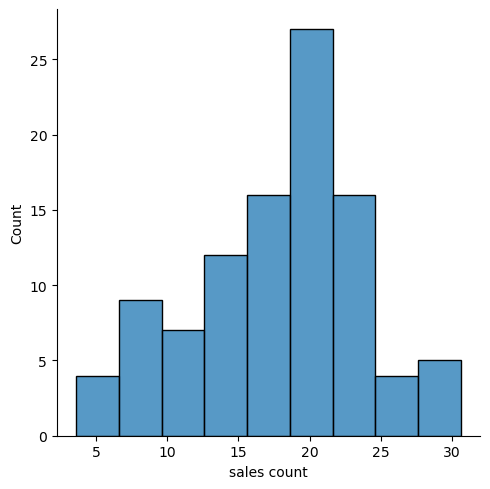

In [24]:
sns.displot(np.sqrt(data["sales count"]))

# Skewed Data

In [26]:
data.skew().sort_values(ascending=True)

C:\Users\smita\AppData\Local\Temp\ipykernel_7388\2851185186.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew().sort_values(ascending=True)


sku                         -6.961790
Visibility (10m)            -0.510144
Dew point temperature(°C)   -0.258434
Temperature(°C)             -0.228464
Humidity(%)                 -0.099058
Snowfall (cm)                0.000000
Month                        0.000000
Year                         0.000000
Hour                         0.053106
Day                          0.112810
sales count                  0.579139
Wind speed (m/s)             1.334199
Solar Radiation (MJ/m2)      1.495096
Rainfall(mm)                 8.084681
dtype: float64

# Remove Multicollinearity

C:\Users\smita\AppData\Local\Temp\ipykernel_7388\3442229956.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True, cmap="coolwarm")


<Axes: >

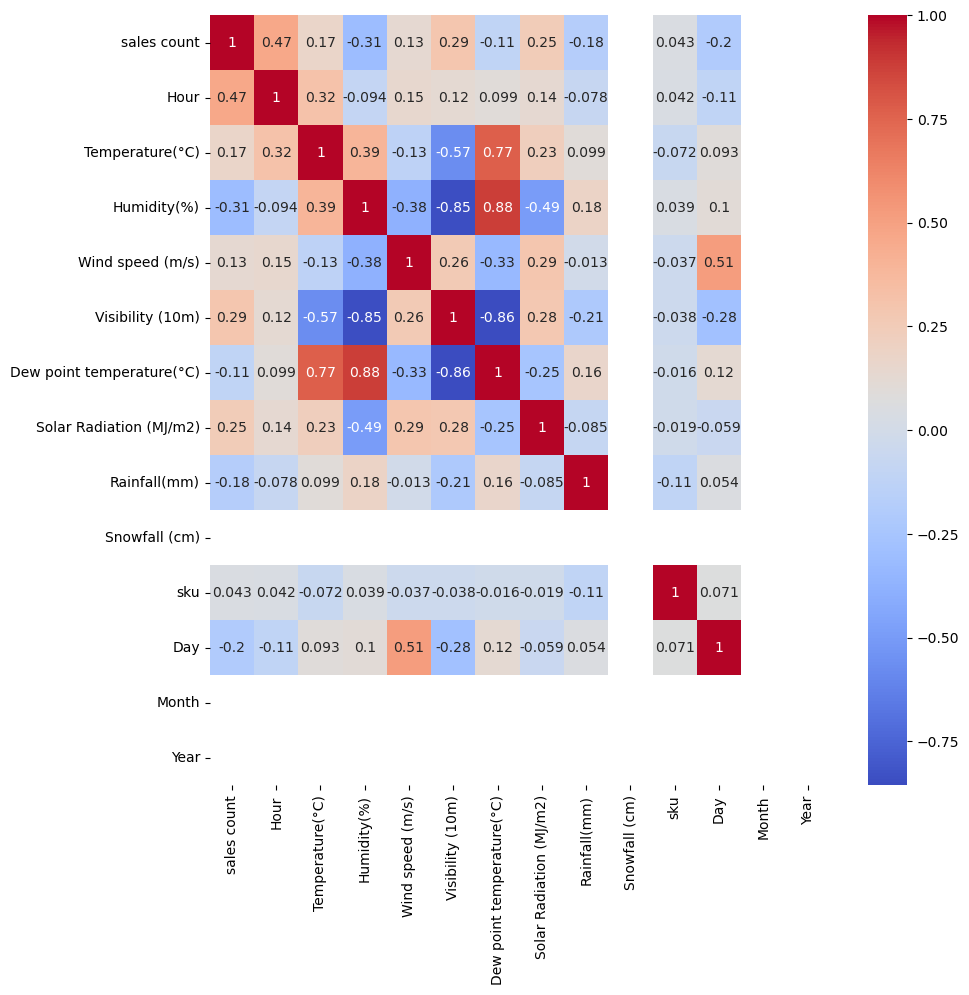

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True, cmap="coolwarm")

In [28]:
def get_vif(data):
    vif = pd.DataFrame()
    vif["variables"] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif

In [29]:
not_for_vif = ["DAy","Month","Year","sales count"]
get_vif(data[[i for i in data.describe().columns if i not in not_for_vif]])

C:\Users\smita\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,Hour,5.195216
1,Temperature(°C),7.228139
2,Humidity(%),35.493512
3,Wind speed (m/s),9.262899
4,Visibility (10m),22.083673
5,Dew point temperature(°C),36.112274
6,Solar Radiation (MJ/m2),3.004423
7,Rainfall(mm),1.104651
8,Snowfall (cm),NaN
9,sku,64.142861


In [35]:
data.drop(["Dew point temperature(°C)"], axis=1, inplace=True)


# Encoding

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sales count              100 non-null    int64  
 1   Hour                     100 non-null    int64  
 2   Temperature(°C)          100 non-null    float64
 3   Humidity(%)              100 non-null    int64  
 4   Wind speed (m/s)         100 non-null    float64
 5   Visibility (10m)         100 non-null    int64  
 6   Solar Radiation (MJ/m2)  100 non-null    float64
 7   Rainfall(mm)             100 non-null    float64
 8   Snowfall (cm)            100 non-null    int64  
 9   Seasons                  100 non-null    object 
 10  Holiday                  100 non-null    object 
 11  Functioning Day          100 non-null    object 
 12  sku                      100 non-null    int64  
 13  weekday                  100 non-null    object 
 14  Day                      10

In [37]:
cat_features = ["Seasons", "Holiday", "weekday", ]

In [39]:
data["Holiday"].value_counts()

No Holiday     99
No Holiday      1
Name: Holiday, dtype: int64

In [40]:
data["Functioning Day"].value_counts()

Yes    100
Name: Functioning Day, dtype: int64

In [41]:
data["Seasons"].value_counts()

Winter    100
Name: Seasons, dtype: int64

In [43]:
data["weekday"].value_counts()

Friday      24
Saturday    24
Sunday      24
Monday      24
Tuesday      4
Name: weekday, dtype: int64

In [46]:
data_weekday = pd.get_dummies(data["weekday"], drop_first = True)
data_season = pd.get_dummies(data["Seasons"], drop_first = True)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sales count              100 non-null    int64  
 1   Hour                     100 non-null    int64  
 2   Temperature(°C)          100 non-null    float64
 3   Humidity(%)              100 non-null    int64  
 4   Wind speed (m/s)         100 non-null    float64
 5   Visibility (10m)         100 non-null    int64  
 6   Solar Radiation (MJ/m2)  100 non-null    float64
 7   Rainfall(mm)             100 non-null    float64
 8   Snowfall (cm)            100 non-null    int64  
 9   Seasons                  100 non-null    object 
 10  Holiday                  100 non-null    object 
 11  Functioning Day          100 non-null    object 
 12  sku                      100 non-null    int64  
 13  weekday                  100 non-null    object 
 14  Day                      10

In [48]:
data["Holiday"] = data["Holiday"].map({"No Holiday": 0})
data["Functioning Day"] = data["Functioning Day"].map({"YES":1})

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sales count              100 non-null    int64  
 1   Hour                     100 non-null    int64  
 2   Temperature(°C)          100 non-null    float64
 3   Humidity(%)              100 non-null    int64  
 4   Wind speed (m/s)         100 non-null    float64
 5   Visibility (10m)         100 non-null    int64  
 6   Solar Radiation (MJ/m2)  100 non-null    float64
 7   Rainfall(mm)             100 non-null    float64
 8   Snowfall (cm)            100 non-null    int64  
 9   Seasons                  100 non-null    object 
 10  Holiday                  99 non-null     float64
 11  Functioning Day          0 non-null      float64
 12  sku                      100 non-null    int64  
 13  weekday                  100 non-null    object 
 14  Day                      10

In [50]:
data = pd.concat([data,data_season,data_weekday],axis=1)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sales count              100 non-null    int64  
 1   Hour                     100 non-null    int64  
 2   Temperature(°C)          100 non-null    float64
 3   Humidity(%)              100 non-null    int64  
 4   Wind speed (m/s)         100 non-null    float64
 5   Visibility (10m)         100 non-null    int64  
 6   Solar Radiation (MJ/m2)  100 non-null    float64
 7   Rainfall(mm)             100 non-null    float64
 8   Snowfall (cm)            100 non-null    int64  
 9   Seasons                  100 non-null    object 
 10  Holiday                  99 non-null     float64
 11  Functioning Day          0 non-null      float64
 12  sku                      100 non-null    int64  
 13  weekday                  100 non-null    object 
 14  Day                      10

In [52]:
data.drop(["Seasons","weekday"],axis=1, inplace=True)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sales count              100 non-null    int64  
 1   Hour                     100 non-null    int64  
 2   Temperature(°C)          100 non-null    float64
 3   Humidity(%)              100 non-null    int64  
 4   Wind speed (m/s)         100 non-null    float64
 5   Visibility (10m)         100 non-null    int64  
 6   Solar Radiation (MJ/m2)  100 non-null    float64
 7   Rainfall(mm)             100 non-null    float64
 8   Snowfall (cm)            100 non-null    int64  
 9   Holiday                  99 non-null     float64
 10  Functioning Day          0 non-null      float64
 11  sku                      100 non-null    int64  
 12  Day                      100 non-null    int64  
 13  Month                    100 non-null    int64  
 14  Year                     10

In [54]:
data.head()

,sales count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,sku,Day,Month,Year,Monday,Saturday,Sunday,Tuesday
0,854,0,-5.2,37,2.2,2000,0.0,0.0,0,0.0,NaN,10017413,1,12,2017,0,0,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0,0.0,NaN,10016283,1,12,2017,0,0,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0,0.0,NaN,10009781,1,12,2017,0,0,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0,NaN,NaN,10015921,1,12,2017,0,0,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0,0.0,NaN,10017833,1,12,2017,0,0,0,0


In [55]:
data.drop(["Functioning Day","Holiday"],axis=1, inplace=True)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sales count              100 non-null    int64  
 1   Hour                     100 non-null    int64  
 2   Temperature(°C)          100 non-null    float64
 3   Humidity(%)              100 non-null    int64  
 4   Wind speed (m/s)         100 non-null    float64
 5   Visibility (10m)         100 non-null    int64  
 6   Solar Radiation (MJ/m2)  100 non-null    float64
 7   Rainfall(mm)             100 non-null    float64
 8   Snowfall (cm)            100 non-null    int64  
 9   sku                      100 non-null    int64  
 10  Day                      100 non-null    int64  
 11  Month                    100 non-null    int64  
 12  Year                     100 non-null    int64  
 13  Monday                   100 non-null    uint8  
 14  Saturday                 10

In [57]:
data.head()

,sales count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),sku,Day,Month,Year,Monday,Saturday,Sunday,Tuesday
0,854,0,-5.2,37,2.2,2000,0.0,0.0,0,10017413,1,12,2017,0,0,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0,10016283,1,12,2017,0,0,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0,10009781,1,12,2017,0,0,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0,10015921,1,12,2017,0,0,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0,10017833,1,12,2017,0,0,0,0


In [107]:
data.columns


Index(['sales count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'sku', 'Day', 'Month', 'Year',
       'Monday', 'Saturday', 'Sunday', 'Tuesday'],
      dtype='object')

# Split Data for Training & Testing

In [60]:
x = data.drop("sales count", axis=1)
y = data["sales count"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2024)
print("Shape of x_train : ",x_train.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of x_test : ",x_test.shape)
print("Shape of y_test : ",y_test.shape)

Shape of x_train :  (80, 16)
Shape of y_train :  (80,)
Shape of x_test :  (20, 16)
Shape of y_test :  (20,)


# Scaling

In [61]:
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [62]:
x_train[:2]

array([[-0.13762491, -0.9231121 , -1.57217494, -0.75362885,  0.97764018,
         1.16012158, -0.16966066,  0.        ,  0.10330417, -1.43165827,
         0.        ,  0.        , -0.57735027, -0.57735027, -0.57735027,
        -0.22941573],
       [ 1.29224429,  0.85136622, -0.38271859, -0.75362885,  0.39637024,
        -0.5788903 , -0.16966066,  0.        ,  0.11206554, -0.58950634,
         0.        ,  0.        , -0.57735027,  1.73205081, -0.57735027,
        -0.22941573]])

In [63]:
sc.mean_

array([1.09625000e+01, 7.13750000e-01, 5.96875000e+01, 2.07375000e+00,
       1.30473750e+03, 2.16375000e-01, 5.12500000e-02, 0.00000000e+00,
       9.89750516e+06, 2.70000000e+00, 1.20000000e+01, 2.01700000e+03,
       2.50000000e-01, 2.50000000e-01, 2.50000000e-01, 5.00000000e-02])

In [64]:
sc.scale_

array([6.99364667e+00, 4.56472189e+00, 2.26994459e+01, 1.15939033e+00,
       7.07072517e+02, 3.73775480e-01, 3.02073563e-01, 1.00000000e+00,
       1.00098420e+06, 1.18743421e+00, 1.00000000e+00, 1.00000000e+00,
       4.33012702e-01, 4.33012702e-01, 4.33012702e-01, 2.17944947e-01])

# Training ML Model

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [67]:
y_pred = lr.predict(x_test)

In [68]:
y_pred

array([325.38636458, 516.06088966, 129.82315049, 550.46064871,
       245.43459735, 109.12032846, 375.17747958, 284.6820616 ,
       414.41707728, 593.64820952, 482.15516381, 526.13779732,
       254.78081074, 266.94016932, 469.41914949, 376.98360777,
       537.42869105, 373.17286175, 473.46894213, 258.93161131])

# Model Evaluation

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [70]:
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"MAE : {MAE}")
print(f"R2 : {R2}")

MSE : 16491.105620185794
RMSE : 128.4176997932364
MAE : 104.9376648937969
R2 : 0.23088798521735254


In [76]:
def get_metrics(y_true, y_pred, model_name):
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_true, y_pred)
    R2 = r2_score(y_true, y_pred)
    print(f"{model_name} : MSE: {round(MSE, 3)}, RMSE: {round(RMSE, 3)}, MAE: {round(MAE, 3)}, R2: {round(R2, 3)}")

In [77]:
get_metrics(y_test, y_pred, "LinearRegression")

LinearRegression : MSE: 16491.106, RMSE: 128.418, MAE: 104.938, R2: 0.231


In [81]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [86]:
rir = Ridge().fit(x_train, y_train)
y_pred_rir = rir.predict(x_test)

lar = Lasso().fit(x_train, y_train)
y_pred_lar = lar.predict(x_test)

poly = PolynomialFeatures(2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

poly_r = LinearRegression().fit(x_train_poly, y_train)
y_pred_poly = poly_r.predict(x_test_poly)

svr = SVR().fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)

knnr = KNeighborsRegressor().fit(x_train, y_train)
y_pred_knnr = knnr.predict(x_test)

dtr= DecisionTreeRegressor().fit(x_train, y_train)
y_pred_dtr = dtr.predict(x_test)

rfr = RandomForestRegressor().fit(x_train, y_train)
y_pred_rfr = rfr.predict(x_test)

xgbr = XGBRegressor().fit(x_train, y_train)
y_pred_xgbr = xgbr.predict(x_test)

In [87]:
get_metrics(y_test, y_pred_rir, "Ridge")
get_metrics(y_test, y_pred_lar, "Lasso")
get_metrics(y_test, y_pred_poly, "Polynomial Regression")
get_metrics(y_test, y_pred_svr, "SVR")
get_metrics(y_test, y_pred_knnr, "K-Nearest Neighbors Regressor")
get_metrics(y_test, y_pred_dtr, "Decision Tree Regressor")
get_metrics(y_test, y_pred_rfr, "Random Forest Regressor")
get_metrics(y_test, y_pred_xgbr, "XGBoost Regressor")


Ridge : MSE: 16141.358, RMSE: 127.049, MAE: 103.112, R2: 0.247
Lasso : MSE: 15817.836, RMSE: 125.769, MAE: 101.663, R2: 0.262
Polynomial Regression : MSE: 62362430673887.21, RMSE: 7896988.709, MAE: 1766272.953, R2: -2908458401.184
SVR : MSE: 21110.082, RMSE: 145.293, MAE: 120.598, R2: 0.015
K-Nearest Neighbors Regressor : MSE: 17266.714, RMSE: 131.403, MAE: 109.41, R2: 0.195
Decision Tree Regressor : MSE: 54143.55, RMSE: 232.688, MAE: 178.85, R2: -1.525
Random Forest Regressor : MSE: 5781.158, RMSE: 76.034, MAE: 63.836, R2: 0.73
XGBoost Regressor : MSE: 5459.831, RMSE: 73.891, MAE: 57.829, R2: 0.745


# Visualise Model Prediction

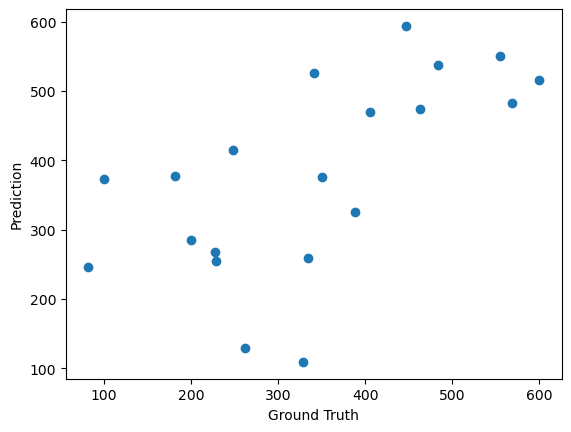

In [88]:
plt.scatter(y_test, y_pred)
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

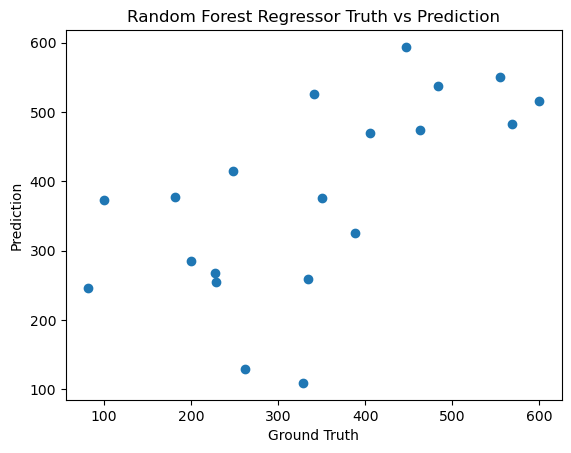

In [89]:
plt.scatter(y_test, y_pred)
plt.title("Random Forest Regressor Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

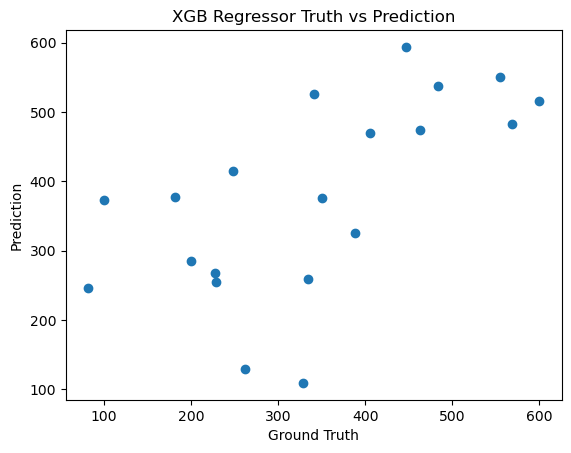

In [90]:
plt.scatter(y_test, y_pred)
plt.title("XGB Regressor Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

# HyperParameter Tuning for Random Forest Regressor


In [91]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
               'max_depth': max_depth,
              'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [92]:
import time
start_time = time.time()

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)
y_pred_rf_random = rf_random.predict(x_test)

print("Time taken to training using random search :", time.time()-start_time)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\smita\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Time taken to training using random search : 207.21452355384827


In [93]:
get_metrics(y_test, y_pred_rf_random, "RandomForestRegressor Fine Tunning")

RandomForestRegressor Fine Tunning : MSE: 6673.015, RMSE: 81.689, MAE: 65.004, R2: 0.689


In [94]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 120,
 'bootstrap': True}

In [96]:
rf_tuned = RandomForestRegressor(n_estimators =1800,
                                 min_samples_split = 2,
                                 min_samples_leaf = 2,
                                 max_features = "auto",
                                 max_depth = 120,
                                 bootstrap = True)
rf_tuned.fit(x_train, y_train)
y_pred_rf_tuned = rf_tuned.predict(x_test)
get_metrics(y_test, y_pred_rf_tuned, "RandomForestRegressor With Best Parameters")

C:\Users\smita\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor With Best Parameters : MSE: 6887.001, RMSE: 82.988, MAE: 66.009, R2: 0.679


# Hyperparameter Tuning for XGBoost Regressor

In [97]:
from sklearn.model_selection import RandomizedSearchCV
import time
start_time = time.time()
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
         'learning_rate': [0.01, 0.1, 0.2, 0.3],
         'subsample': np.arange(0.5, 1.0, 0.1),
         'colsample_bytree': np.arange(0.4, 1.0, 0.1),
         'colsample_bylevel' : np.arange(0.4, 1.0, 0.1),
         'n_estimators' : [100, 500, 1000]}
xgbr = XGBRegressor(seed = 20)
rscv = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         cv=5,
                         verbose=1)
rscv.fit(x_train, y_train)
y_pred_xgb_random = rscv.predict(x_test)
get_metrics(y_test, y_pred_xgb_random, "XGBRegressor With Best Parameters")
print("Time taken to training using randomize search :" ,time.time()-start_time)
print("Best parameters:", rscv.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
XGBRegressor With Best Parameters : MSE: 9638.043, RMSE: 98.174, MAE: 71.568, R2: 0.551
Time taken to training using randomize search : 16.998942613601685
Best parameters: {'subsample': 0.5, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.6}


In [100]:
xgbr = XGBRegressor(subsample=0.6,
                   n_estimators=100,
                   max_depth=6,
                   learning_rate=0.1,
                   colsample_bytree=0.7,
                   colsample_bylevel=0.4)
xgbr.fit(x_train, y_train)
y_pred_tuned = xgbr.predict(x_test)
get_metrics(y_test, y_pred_tuned, "XGBRegressor With Best Parameters")

XGBRegressor With Best Parameters : MSE: 6569.103, RMSE: 81.05, MAE: 63.621, R2: 0.694


# Save ML Best Model

In [103]:
import pickle
import os
dir = r"C:\data\Models"
model_file_name = "xgboost_regressor_r2_0_92_v1.pkl"
model_file_path = os.path.join(dir,model_file_name)
model_file_path
pickle.dump(xgbr, open(model_file_path, "wb"))

In [104]:
x_test[0,:]

array([ 0.00536201,  0.25987344, -0.47082647, -0.23611548,  0.14321374,
        2.09651259, -0.16966066,  0.        ,  0.10829126, -0.58950634,
        0.        ,  0.        , -0.57735027,  1.73205081, -0.57735027,
       -0.22941573])

In [105]:
y_test

35    388
19    600
26    262
17    555
77     82
24    328
70    350
58    200
95    248
14    447
91    568
87    341
50    228
49    227
21    405
6     181
16    484
5     100
15    463
34    334
Name: sales count, dtype: int64

# Dump Scaling Parameters

In [106]:
sc_dump_path = r"C:\data\Models\sc.pkl"
pickle.dump(sc, open(sc_dump_path, "wb"))